# **Setup**

In [1]:
import numpy as np 
import pandas as pd 
from IPython.display import clear_output
import matplotlib.pyplot as plt 
import seaborn as sns

# **Data Import**

In [2]:
df = pd.read_csv('equipment_failure_data.csv')

print(df.shape)
df.head()

(307751, 16)


,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12-02-2014,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12-03-2014,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12-04-2014,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12-05-2014,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12-06-2014,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [3]:
df.columns

Index(['ID', 'DATE', 'REGION_CLUSTER', 'MAINTENANCE_VENDOR', 'MANUFACTURER',
       'WELL_GROUP', 'S15', 'S17', 'S13', 'S5', 'S16', 'S19', 'S18',
       'EQUIPMENT_FAILURE', 'S8', 'AGE_OF_EQUIPMENT'],
      dtype='object')

In [4]:
df.rename({'ID':'Machine_ID','DATE':'Date','WELL_GROUP':'MC_Type','REGION_CLUSTER':'Region',
           'S15':'S15_Sensor','S17':'S17_Sensor','S13':'S13_Sensor','S5':'S5_Sensor','S16':'S16_Sensor',
           'S19':'S19_Sensor','S18':'S18_Sensor','AGE_OF_EQUIPMENT':'MC_Age',
           'MAINTENANCE_VENDOR':'Serv_Provider','MANUFACTURER':'MC_Make'},axis=1,inplace=True)
df.head()

,Machine_ID,Date,Region,Serv_Provider,MC_Make,MC_Type,S15_Sensor,S17_Sensor,S13_Sensor,S5_Sensor,S16_Sensor,S19_Sensor,S18_Sensor,EQUIPMENT_FAILURE,S8,MC_Age
0,100001,12-02-2014,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12-03-2014,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12-04-2014,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12-05-2014,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12-06-2014,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


## **Check Missing Values**

In [5]:
df.isna().sum()

Machine_ID           0
Date                 0
Region               0
Serv_Provider        0
MC_Make              0
MC_Type              0
S15_Sensor           0
S17_Sensor           0
S13_Sensor           0
S5_Sensor            0
S16_Sensor           0
S19_Sensor           0
S18_Sensor           0
EQUIPMENT_FAILURE    0
S8                   0
MC_Age               0
dtype: int64

## **Check DTypes**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307751 entries, 0 to 307750
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Machine_ID         307751 non-null  int64  
 1   Date               307751 non-null  object 
 2   Region             307751 non-null  object 
 3   Serv_Provider      307751 non-null  object 
 4   MC_Make            307751 non-null  object 
 5   MC_Type            307751 non-null  int64  
 6   S15_Sensor         307751 non-null  float64
 7   S17_Sensor         307751 non-null  float64
 8   S13_Sensor         307751 non-null  float64
 9   S5_Sensor          307751 non-null  float64
 10  S16_Sensor         307751 non-null  float64
 11  S19_Sensor         307751 non-null  float64
 12  S18_Sensor         307751 non-null  float64
 13  EQUIPMENT_FAILURE  307751 non-null  int64  
 14  S8                 307751 non-null  float64
 15  MC_Age             307751 non-null  int64  
dtypes:

## **Convert Date Dtype**

In [7]:
df['Date'].dtype

dtype('O')

In [8]:
df['Date']

0         12-02-2014
1         12-03-2014
2         12-04-2014
3         12-05-2014
4         12-06-2014
             ...    
307746      11/27/16
307747      11/28/16
307748      11/29/16
307749      11/30/16
307750    12-01-2016
Name: Date, Length: 307751, dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

## **Statistical Summary**

In [10]:
df.describe(include=('float'))

,S15_Sensor,S17_Sensor,S13_Sensor,S5_Sensor,S16_Sensor,S19_Sensor,S18_Sensor,S8
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,144.665715
std,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,240.773926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000
25%,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,9.250000
50%,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,53.080000
75%,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,165.092608
max,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,2068.110000


In [11]:
df.describe(include=('int'))

,Machine_ID,MC_Type,EQUIPMENT_FAILURE,MC_Age
count,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,0.001368,2524.192399
std,177.574390,2.284121,0.036961,3158.930976
min,100001.000000,1.000000,0.000000,0.000000
25%,100161.000000,3.000000,0.000000,721.000000
50%,100311.000000,5.000000,0.000000,1113.000000
75%,100467.000000,6.000000,0.000000,2784.000000
max,100617.000000,8.000000,1.000000,15170.000000


# **Data Exploration**

## **No. Of Unique Machines**

In [12]:
print(df['Machine_ID'].nunique())
print(df['Machine_ID'].unique()[0:10])

421
[100001 100003 100009 100014 100017 100018 100019 100020 100022 100036]


## **No. Of Maint. Service Providers**

In [13]:
print(df['Serv_Provider'].nunique())
print(df['Serv_Provider'].unique())

8
['O' 'L' 'M' 'K' 'J' 'I' 'N' 'P']


## **No Of Manufacturers**

In [14]:
print(df['MC_Make'].nunique())
print(df['MC_Make'].unique())

10
['Y' 'T' 'X' 'S' 'Q' 'Z' 'V' 'W' 'U' 'R']


## **Machine Failure Data**

### **Machine Failure Events**

In [16]:
df['EQUIPMENT_FAILURE'].value_counts()

EQUIPMENT_FAILURE
0    307330
1       421
Name: count, dtype: int64

### **Failures By Manufacturer**

In [25]:
df[df['EQUIPMENT_FAILURE']==1]['MC_Make'].value_counts()

MC_Make
T    59
S    52
X    46
W    44
U    43
Y    38
Q    38
Z    35
V    34
R    32
Name: count, dtype: int64

<Axes: xlabel='MC_Make'>

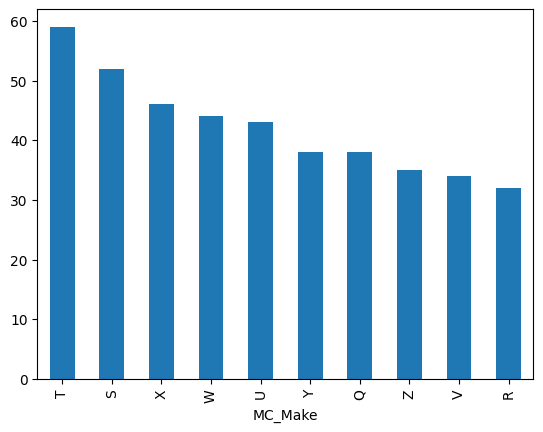

In [24]:
df[df['EQUIPMENT_FAILURE']==1]['MC_Make'].value_counts().plot(kind='bar')

In [21]:
df[df['EQUIPMENT_FAILURE']==1]['MC_Make'].value_counts(normalize=True)*100

MC_Make
T    14.014252
S    12.351544
X    10.926366
W    10.451306
U    10.213777
Y     9.026128
Q     9.026128
Z     8.313539
V     8.076010
R     7.600950
Name: proportion, dtype: float64

### **Failures By Service Provider**

In [27]:
df[df['EQUIPMENT_FAILURE']==1]['Serv_Provider'].value_counts()

Serv_Provider
J    58
O    57
M    57
K    53
P    53
N    51
L    46
I    46
Name: count, dtype: int64

<Axes: xlabel='Serv_Provider'>

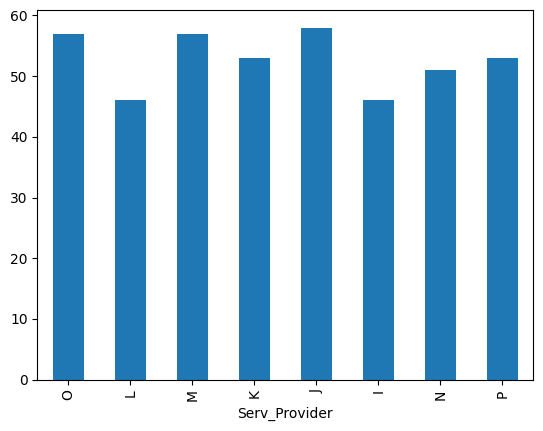

In [34]:
df[df['EQUIPMENT_FAILURE']==1]['Serv_Provider'].value_counts(sort=False).plot(kind='bar')

### **Failures By Machine Type**

In [33]:
df[df['EQUIPMENT_FAILURE']==1]['MC_Type'].value_counts(sort=False)

MC_Type
1    48
3    52
2    56
4    49
6    58
7    46
8    57
5    55
Name: count, dtype: int64

<Axes: xlabel='MC_Type'>

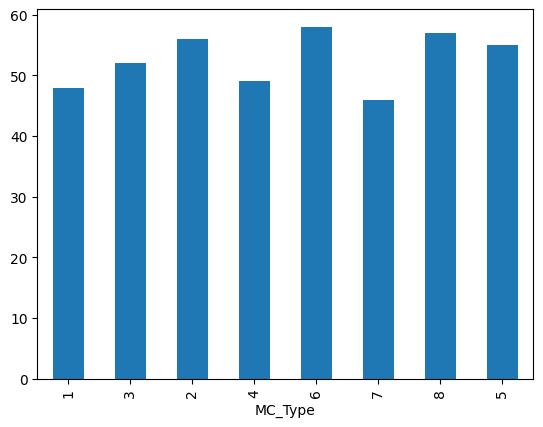

In [32]:
df[df['EQUIPMENT_FAILURE']==1]['MC_Type'].value_counts(sort=False).plot(kind='bar')

In [29]:
df.head()

,Machine_ID,Date,Region,Serv_Provider,MC_Make,MC_Type,S15_Sensor,S17_Sensor,S13_Sensor,S5_Sensor,S16_Sensor,S19_Sensor,S18_Sensor,EQUIPMENT_FAILURE,S8,MC_Age
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884
